In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pygmid import Lookup as lk

In [2]:
table_path = '/home/bmurmann/eda/designs/Book-on-gm-ID-design/starter_files_open_source_tools/ihp-sg13g2/simulation/'
fet = lk(table_path+'sg13_lv_nmos.mat')
dev='sg13_lv_nmos'

In [3]:
# chices for plots
L1 = np.array([0.13, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4])
VSB1 = 0
VDS1 = 0.6

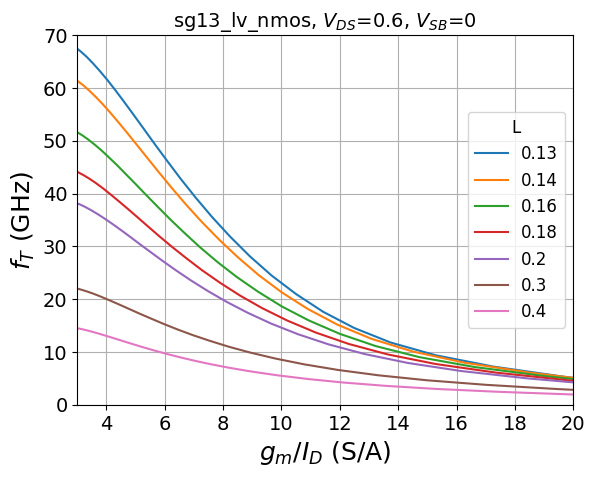

In [4]:
# plot fT versus gm/ID for all L
gm_id2 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft2 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), ft2.transpose()/1e9)
ax.legend(loc='center right', title='L', labels=L1.tolist(), title_fontsize=12, fontsize=12)
#plt.legend(fontsize=14)
plt.xlim(3, 20)
plt.ylim(0, 70)
plt.xlabel('$g_m/I_D$ (S/A)', fontsize=18)
plt.ylabel('$f_T$ (GHz)', fontsize=18)
plt.title(dev+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

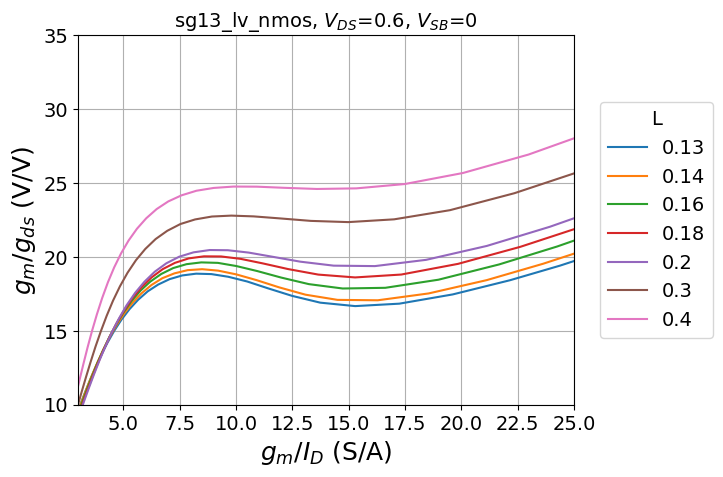

In [5]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = fet.lookup('GM_GDS', L=L1, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gm_gds2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='L', labels=L1.tolist(), title_fontsize=14, fontsize=14)
plt.xlim(3, 25)
plt.ylim(10, 35)
plt.xlabel('$g_m/I_D$ (S/A)', fontsize=18)
plt.ylabel('$g_m/g_{ds}$ (V/V)', fontsize=18)
plt.title(dev+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

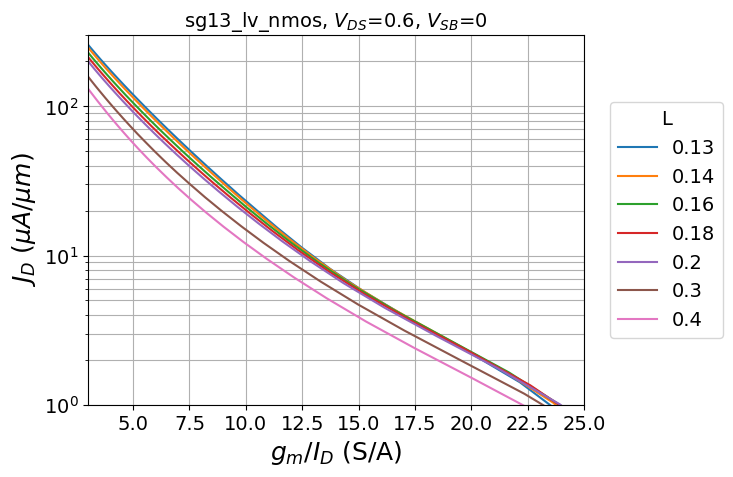

In [6]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=L1, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), jd2.transpose())
ax.legend(loc='center right', title='L', labels=L1.tolist(), bbox_to_anchor=(1.3, 0.5), title_fontsize=14, fontsize=14)
plt.xlim(3, 25)
plt.ylim(1, 300)
plt.xlabel('$g_m/I_D$ (S/A)', fontsize=18)
plt.ylabel('$J_D$ ($\mu A/ \mu m$)', fontsize=18)
plt.grid(which='minor')
plt.grid(which='major')
plt.title(dev+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

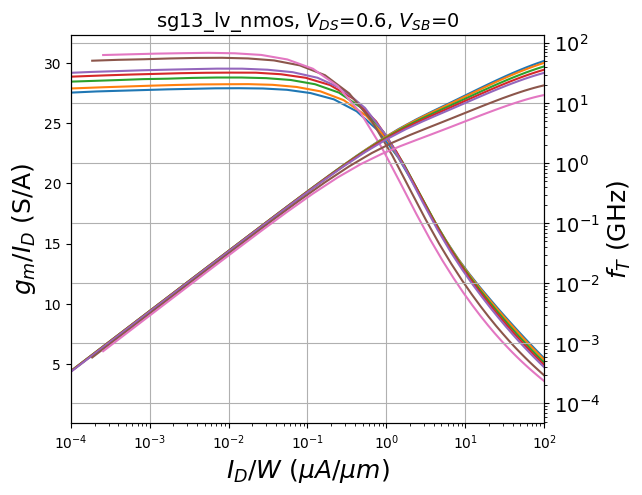

In [10]:
# combo plot
fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$I_D/W$ ($\mu A/\mu m$)', fontsize=18)
ax1.set_ylabel('$g_m/I_D$ (S/A)', fontsize=18)
ax1.semilogx(jd2.transpose(), gm_id2.transpose(), )

ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('$f_T$ (GHz)', fontsize=18)
ax2.loglog(jd2.transpose(), ft2.transpose()/1e9)
ax2.tick_params(axis='y')
#ax2.legend(loc='center right', title='L', labels=L1.tolist(), bbox_to_anchor=(1.3, 0.5), title_fontsize=14, fontsize=14)

fig.tight_layout()
plt.title(dev+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1), fontsize=14)
plt.xlim(1e-4, 1e2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='major')
plt.show()

